### Logistic Regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('csv/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [8]:
reg.fit(df[['age']], df.bought_insurance)

LinearRegression()

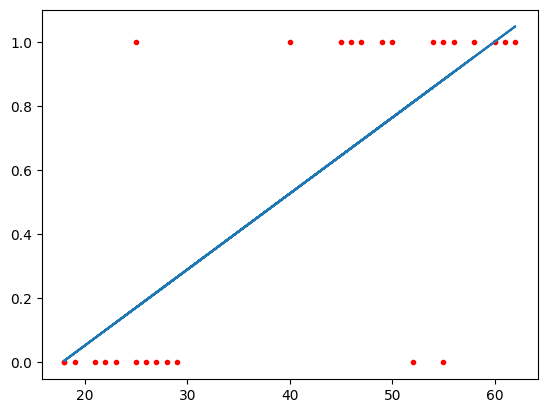

In [42]:
plt.scatter(df.age, df.bought_insurance, color = 'red', marker = '.')
plt.plot(df.age, reg.predict(df[['age']]))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.1)

In [12]:
X_test

,age
25,54
4,46
2,47


In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
model.predict(X_test)

array([1, 1, 1], dtype=int64)

In [16]:
model.score(X_test, y_test)

1.0

In [17]:
model.predict_proba(X_test)

array([[0.16025991, 0.83974009],
       [0.34108401, 0.65891599],
       [0.31363154, 0.68636846]])

### Excerise 4

In [18]:
hr_df = pd.read_csv('csv/HR_comma_sep.csv')
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
left = hr_df[hr_df.left == 1]
left.shape

(3571, 10)

In [20]:
retained = hr_df[hr_df.left == 0]
retained.shape

(11428, 10)

In [21]:
new_df = hr_df.drop(['Department', 'salary'], axis = 1)
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [22]:
new_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


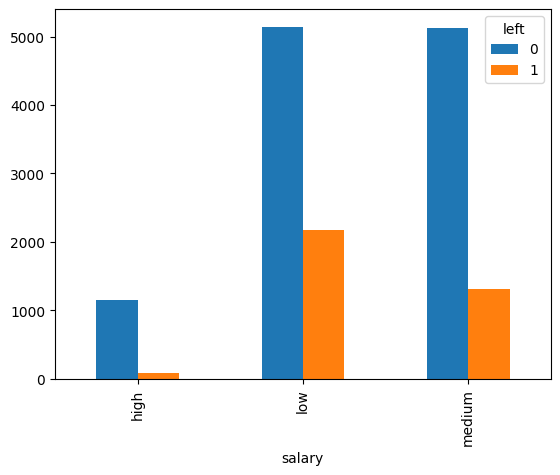

In [23]:
pd.crosstab(hr_df.salary, hr_df.left).plot(kind = 'bar')
plt.show()

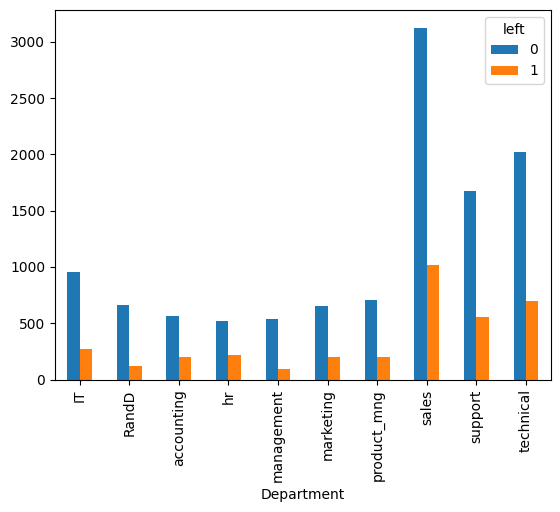

In [24]:
pd.crosstab(hr_df.Department, hr_df.left).plot(kind = 'bar')
plt.show()

In [25]:
df2 = hr_df[['satisfaction_level', 'promotion_last_5years', 'salary']]
df2

,satisfaction_level,promotion_last_5years,salary
0,0.38,0,low
1,0.80,0,medium
2,0.11,0,medium
3,0.72,0,low
4,0.37,0,low
...,...,...,...
14994,0.40,0,low
14995,0.37,0,low
14996,0.37,0,low
14997,0.11,0,low


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
le = LabelEncoder()

In [28]:
df2.salary = le.fit_transform(df2.salary)
df2

C:\Users\soura\AppData\Local\Temp\ipykernel_13412\3033772558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.salary = le.fit_transform(df2.salary)


,satisfaction_level,promotion_last_5years,salary
0,0.38,0,1
1,0.80,0,2
2,0.11,0,2
3,0.72,0,1
4,0.37,0,1
...,...,...,...
14994,0.40,0,1
14995,0.37,0,1
14996,0.37,0,1
14997,0.11,0,1


In [29]:
X = df2.values
X

array([[0.38, 0.  , 1.  ],
       [0.8 , 0.  , 2.  ],
       [0.11, 0.  , 2.  ],
       ...,
       [0.37, 0.  , 1.  ],
       [0.11, 0.  , 1.  ],
       [0.37, 0.  , 1.  ]])

In [30]:
ohe = OneHotEncoder()
ct = ColumnTransformer([('salary', ohe, [2])], remainder = 'passthrough')

In [31]:
X = ct.fit_transform(X)
X

array([[0.  , 1.  , 0.  , 0.38, 0.  ],
       [0.  , 0.  , 1.  , 0.8 , 0.  ],
       [0.  , 0.  , 1.  , 0.11, 0.  ],
       ...,
       [0.  , 1.  , 0.  , 0.37, 0.  ],
       [0.  , 1.  , 0.  , 0.11, 0.  ],
       [0.  , 1.  , 0.  , 0.37, 0.  ]])

In [32]:
X = X[:, 1:]

In [33]:
y = hr_df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
lr.predict(X_test)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
y_test

4867     0
4331     0
8211     0
7564     0
7113     0
        ..
3554     0
12404    1
1805     1
14487    1
3314     0
Name: left, Length: 1500, dtype: int64

In [40]:
lr.score(X_test, y_test)

0.7693333333333333